## Impact of September 11 on Travel in the United States:

The Research and Innovative Technology Administration’s Bureau of Transportation Statistics (BTS) conducted a study to evaluate the impact of the September 11, 2001, terrorist attack on U.S. transportation.

The report analyzes monthly passenger movement data between January 1990 and Dec 2003. Data on three monthly time series are given in the file Sept11Travel.xls for this period:
* actual airline revenue passenger miles (Air)
* rail passenger miles (Rail)
* vehicle miles traveled (Auto)

In order to assess the impact of September 11, use the following approach:
* Using data before September 11, forecast future data (under the assumption of no terrorist attack)
* Then, compare the forecasted series with the actual data to assess the impact of the event

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Sept11Travel.csv', parse_dates=['Month'])
print(df.head())

    Month       Air       Rail    Road
0  Jan-90  35153577  454115779  163.28
1  Feb-90  32965187  435086002  153.25
2  Mar-90  39993913  568289732  178.42
3  Apr-90  37981886  568101697  178.68
4  May-90  38419672  539628385  188.88


In [4]:
#Create a date range for the dataset
dates = pd.date_range(start='1990-01-01', freq='MS', periods=len(df))
dates

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01', '2003-09-01', '2003-10-01',
               '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', length=168, freq='MS')

In [5]:
#Create a new column for month and use the month from the created date range
import calendar
df['Mon'] = dates.month
df.head()

Month       Air       Rail    Road  Mon
0  Jan-90  35153577  454115779  163.28    1
1  Feb-90  32965187  435086002  153.25    2
2  Mar-90  39993913  568289732  178.42    3
3  Apr-90  37981886  568101697  178.68    4
4  May-90  38419672  539628385  188.88    5

In [6]:
#Rename the numbers in the Month column to calendar months
df['Mon'] = df['Mon'].apply(lambda x: calendar.month_abbr[x])
df['Mon'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Mon, dtype: object

In [7]:
#Create a new column for year and use the year from the created date range
df['Year'] = dates.year
df['Year'].head()

0    1990
1    1990
2    1990
3    1990
4    1990
Name: Year, dtype: int64

In [8]:
df.drop(['Month'], axis=1, inplace=True)
df.head()

Air       Rail    Road  Mon  Year
0  35153577  454115779  163.28  Jan  1990
1  32965187  435086002  153.25  Feb  1990
2  39993913  568289732  178.42  Mar  1990
3  37981886  568101697  178.68  Apr  1990
4  38419672  539628385  188.88  May  1990

### Rail

In [66]:
df.index = dates
df = df[['Rail']]
df.head(5)

Rail
1990-01-01  454115779
1990-02-01  435086002
1990-03-01  568289732
1990-04-01  568101697
1990-05-01  539628385

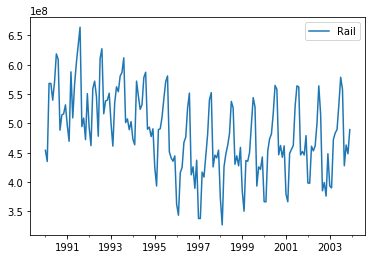

In [10]:
df.plot()

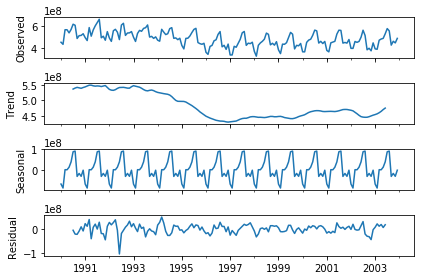

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompRail = seasonal_decompose(df, model='additive', freq=12)
decompRail.plot()
plt.show()

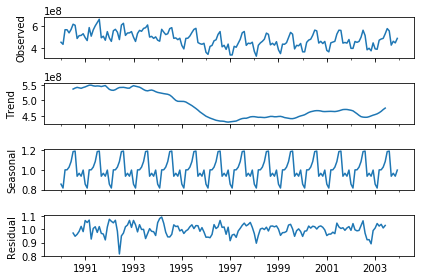

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

decompRail = seasonal_decompose(df, model='multiplicative', freq=12)
decompRail.plot()
plt.show()

In [13]:
#Creating train and test set 
train=df[0:140] 
test=df[140:]

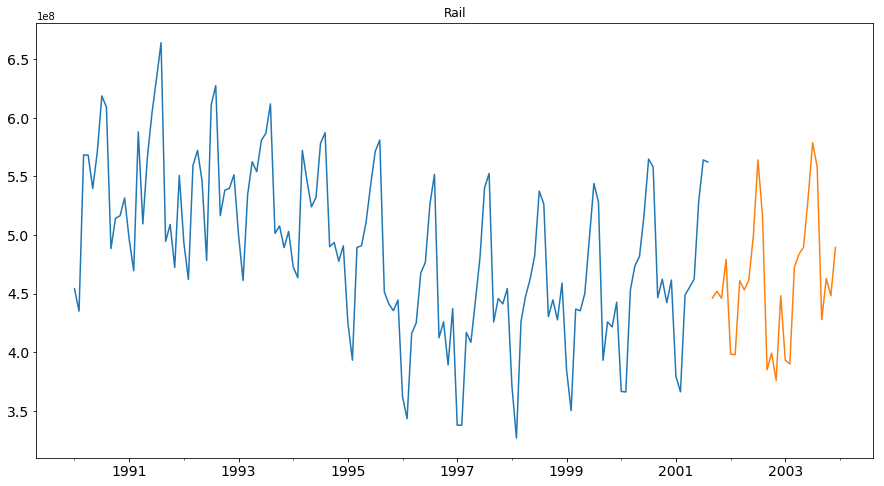

In [14]:
#Plot data
train.Rail.plot(figsize=(15,8), title= 'Rail', fontsize=14)
test.Rail.plot(figsize=(15,8), title= 'Rail', fontsize=14)


### Naive Approach: \hat{y}t+1 = yt

In [15]:
x_train = train.drop('Rail', axis=1)
x_test = test.drop('Rail', axis=1)
y_train = train[['Rail']]
y_test = test[['Rail']]

In [16]:
dd= np.asarray(train.Rail)

In [17]:
dd

array([454115779, 435086002, 568289732, 568101697, 539628385, 570694457,
       618571581, 609210368, 488444939, 514253920, 516429873, 531619395,
       496467387, 469504489, 587905914, 509488334, 566342448, 603845247,
       633450001, 664013874, 494557648, 509037626, 472359118, 550795984,
       493541137, 462084011, 559205172, 572122965, 546043825, 478204759,
       610774196, 627359211, 516516158, 538313763, 539769246, 551397116,
       500349189, 461280157, 534476186, 562429065, 554039017, 580500717,
       586861727, 611839976, 501353952, 507702230, 489299178, 503041903,
       472917856, 463567851, 572167273, 546898075, 524008197, 531971149,
       578257564, 587229076, 490032783, 493619903, 477594716, 490779357,
       425207429, 393268412, 489360683, 490903635, 511120586, 542693418,
       571259638, 580982161, 451385426, 441202778, 435470011, 444598571,
       362022328, 343413949, 416042895, 425092726, 467573082, 476554648,
       525954361, 551695523, 412344840, 425991795, 

In [18]:
y_hat = test.copy()

In [19]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

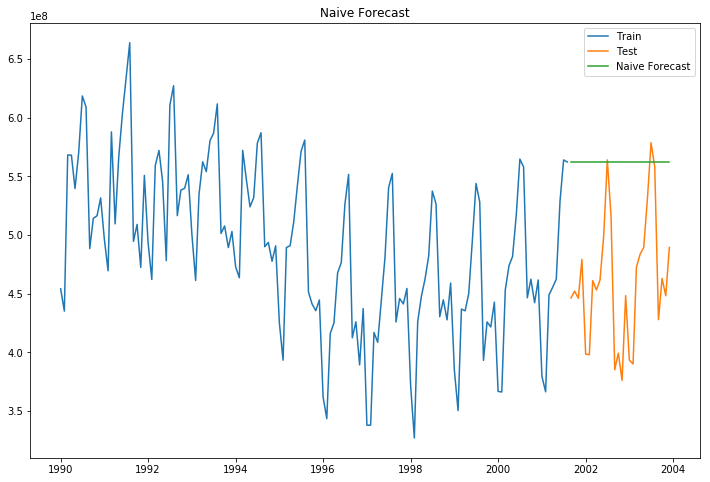

In [20]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Rail'], label='Train')
plt.plot(test.index,test['Rail'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [21]:
#RMSE Calculation
rmse = sqrt(mean_squared_error(test.Rail, y_hat.naive))
rmse = round(rmse, 3)
rmse

114805621.023

In [22]:
abs_error = np.abs(y_test['Rail']-y_hat.naive)
actual = y_test['Rail']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2384

In [23]:
resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['Naive forecast'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0  Naive forecast  1.148056e+08  0.2384

### Moving Average

In [24]:
df1 = df.copy()

In [25]:
df1['moving_avg_forecast'] = df['Rail'].rolling(12).mean()

In [26]:
df1.head(2)

Rail  moving_avg_forecast
1990-01-01  454115779                  NaN
1990-02-01  435086002                  NaN

In [27]:
df1.tail(2)

Rail  moving_avg_forecast
2003-11-01  448181812         4.736755e+08
2003-12-01  489403554         4.771053e+08

In [28]:
#Creating train and test set 
train=df1[0:140] 
test=df1[140:]

In [29]:
y_hat_avg = test.copy()

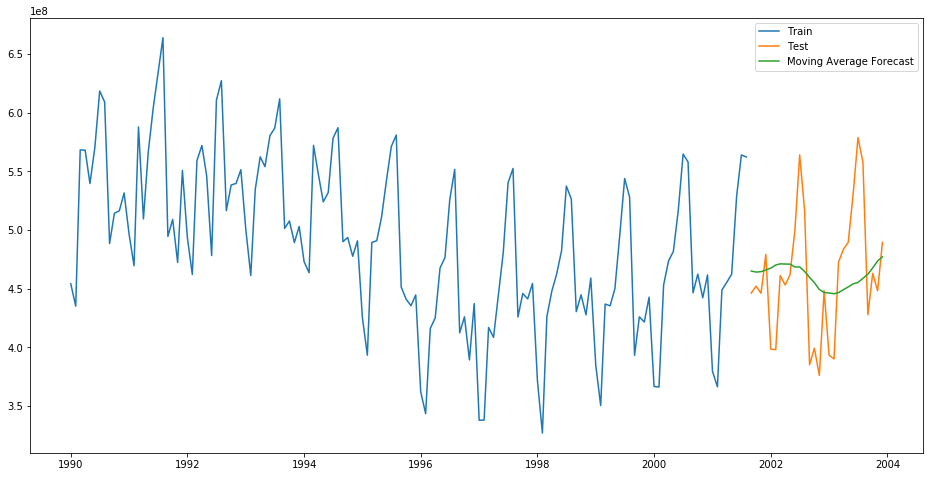

In [30]:
plt.figure(figsize=(16,8))
plt.plot(train['Rail'], label='Train')
plt.plot(test['Rail'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [31]:
y_hat_avg.moving_avg_forecast

2001-09-01    4.650035e+08
2001-10-01    4.641506e+08
2001-11-01    4.644694e+08
2001-12-01    4.659309e+08
2002-01-01    4.675127e+08
2002-02-01    4.701511e+08
2002-03-01    4.711657e+08
2002-04-01    4.709700e+08
2002-05-01    4.709093e+08
2002-06-01    4.684977e+08
2002-07-01    4.684984e+08
2002-08-01    4.646515e+08
2002-09-01    4.595541e+08
2002-10-01    4.551502e+08
2002-11-01    4.493087e+08
2002-12-01    4.467302e+08
2003-01-01    4.463008e+08
2003-02-01    4.456418e+08
2003-03-01    4.465991e+08
2003-04-01    4.491412e+08
2003-05-01    4.514609e+08
2003-06-01    4.540765e+08
2003-07-01    4.553033e+08
2003-08-01    4.587862e+08
2003-09-01    4.623453e+08
2003-10-01    4.676600e+08
2003-11-01    4.736755e+08
2003-12-01    4.771053e+08
Freq: MS, Name: moving_avg_forecast, dtype: float64

In [32]:
rmse = sqrt(mean_squared_error(test.Rail, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

53629725.242

In [33]:
abs_error = np.abs(y_test['Rail']-y_hat_avg.moving_avg_forecast)
actual = y_test['Rail']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0938

In [34]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0           Naive forecast  1.148056e+08  0.2384
0  Moving average forecast  5.362973e+07  0.0938

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [36]:
# create class
model = SimpleExpSmoothing(train['Rail'])

In [37]:
# fit model
model_fit = model.fit(smoothing_level=0.1,optimized=False)
model_fit.params

{'smoothing_level': 0.1,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 454115779.0,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [38]:
y_hat_avg = test.copy()

In [39]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Rail']))

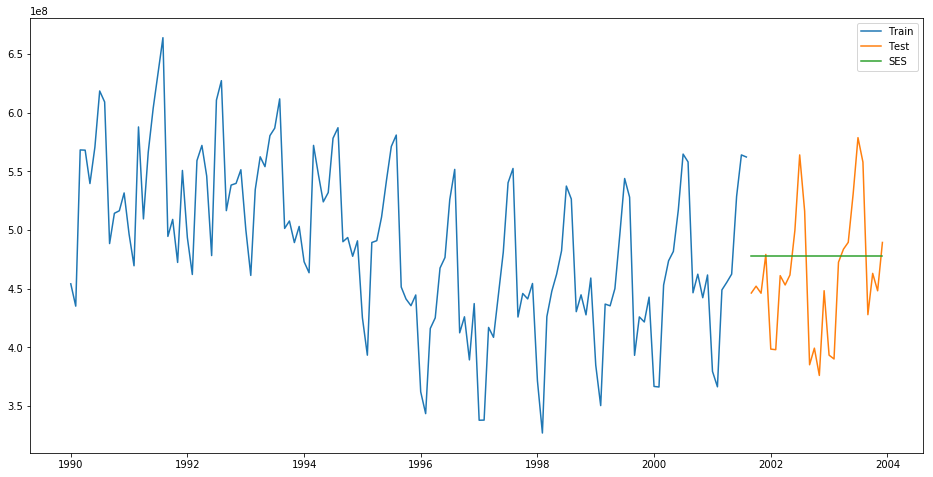

In [40]:
plt.figure(figsize=(16,8))
plt.plot(train['Rail'], label='Train')
plt.plot(test['Rail'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [41]:
rmse = sqrt(mean_squared_error(test.Rail, y_hat_avg.SES))
rmse = round(rmse, 3)
rmse

56711437.568

In [42]:
abs_error = np.abs(y_test['Rail']-y_hat_avg.SES)
actual = y_test['Rail']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.1041

In [43]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0           Naive forecast  1.148056e+08  0.2384
0  Moving average forecast  5.362973e+07  0.0938
0             SES forecast  5.671144e+07  0.1041

### Holts Method

In [44]:
fit1 = ExponentialSmoothing(np.asarray(train['Rail']) ,seasonal_periods=12 ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.7550571745683164,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 454115779.0,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
y_hat_avg['Holt'] = fit1.forecast(len(test))


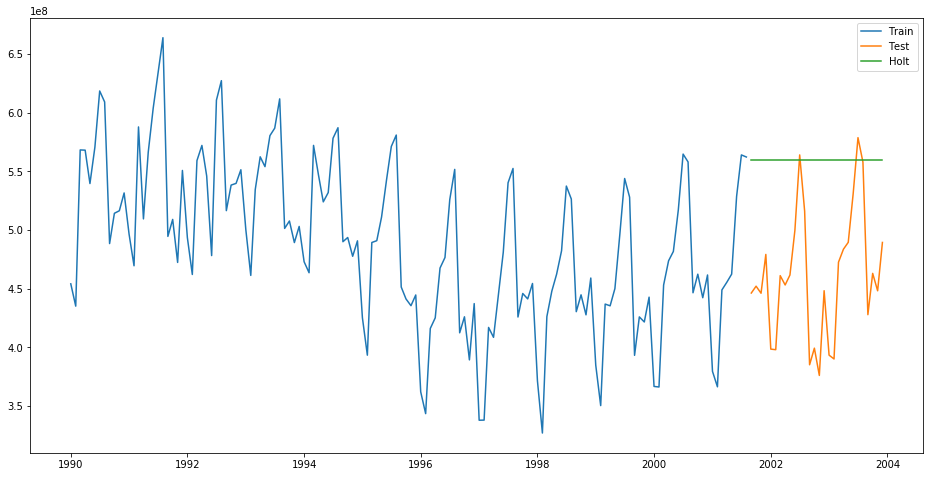

In [46]:
plt.figure(figsize=(16,8))
plt.plot( train['Rail'], label='Train')
plt.plot(test['Rail'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [47]:
rmse = sqrt(mean_squared_error(test.Rail, y_hat_avg.Holt))
rmse = round(rmse, 3)
rmse

112425601.391

In [48]:
abs_error = np.abs(y_test['Rail']-y_hat_avg.Holt)
actual = y_test['Rail']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2331

In [49]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0           Naive forecast  1.148056e+08  0.2384
0  Moving average forecast  5.362973e+07  0.0938
0             SES forecast  5.671144e+07  0.1041
0                     Holt  1.124256e+08  0.2331

### Holt-Winters Method - Additive

In [50]:
y_hat_avg = test.copy()

In [51]:
fit1 = ExponentialSmoothing(np.asarray(train['Rail']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.31578947368421045,
 'smoothing_slope': 0.05263157894736841,
 'smoothing_seasonal': 0.21052631578947364,
 'damping_slope': nan,
 'initial_level': 420388801.5833333,
 'initial_slope': 995291.2638888889,
 'initial_seasons': array([3.37269774e+07, 1.46972004e+07, 1.47900930e+08, 1.47712895e+08,
        1.19239583e+08, 1.50305655e+08, 1.98182779e+08, 1.88821566e+08,
        6.80561374e+07, 9.38651184e+07, 9.60410714e+07, 1.11230593e+08]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

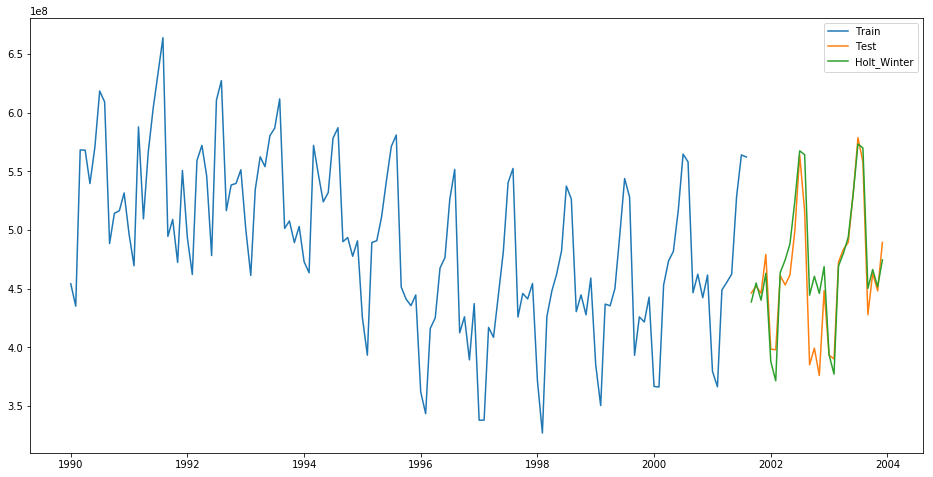

In [53]:
plt.figure(figsize=(16,8))
plt.plot( train['Rail'], label='Train')
plt.plot(test['Rail'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [54]:
rmse = sqrt(mean_squared_error(test.Rail, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

26074270.051

In [55]:
abs_error = np.abs(y_test['Rail']-y_hat_avg.Holt_Winter)
actual = y_test['Rail']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.041

In [56]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0                   Naive forecast  1.148056e+08  0.2384
0          Moving average forecast  5.362973e+07  0.0938
0                     SES forecast  5.671144e+07  0.1041
0                             Holt  1.124256e+08  0.2331
0  Holt Winter forecast - Additive  2.607427e+07  0.0410

In [57]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

Method          rmse    MAPE
0                   Naive forecast  1.148056e+08  0.2384
1          Moving average forecast  5.362973e+07  0.0938
2                     SES forecast  5.671144e+07  0.1041
3                             Holt  1.124256e+08  0.2331
4  Holt Winter forecast - Additive  2.607427e+07  0.0410

### Holt-Winters Method - Multiplicative

In [58]:
fit1 = ExponentialSmoothing(np.asarray(train['Rail']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.7089262950234805,
 'smoothing_slope': 1.175036409307357e-10,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 420388801.5833333,
 'initial_slope': 995291.2638890805,
 'initial_seasons': array([1.08335355, 1.02854335, 1.27203414, 1.26679556, 1.28691905,
        1.34546537, 1.46834122, 1.48749605, 1.17830322, 1.21670126,
        1.18350614, 1.24811029]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [59]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

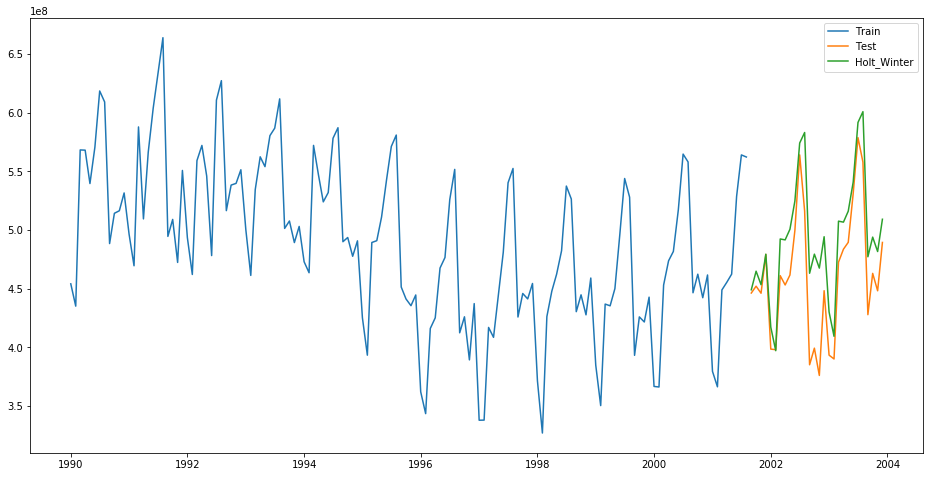

In [60]:
plt.figure(figsize=(16,8))
plt.plot( train['Rail'], label='Train')
plt.plot(test['Rail'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [61]:
rmse = sqrt(mean_squared_error(test.Rail, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

39641797.097

In [62]:
abs_error = np.abs(y_test['Rail']-y_hat_avg.Holt_Winter)
actual = y_test['Rail']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.0721

In [63]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

Method          rmse    MAPE
0                   Naive forecast  1.148056e+08  0.2384
1          Moving average forecast  5.362973e+07  0.0938
2                     SES forecast  5.671144e+07  0.1041
3                             Holt  1.124256e+08  0.2331
4  Holt Winter forecast - Additive  2.607427e+07  0.0410
0      Holt Winter forecast - Mult  3.964180e+07  0.0721

In [64]:
# Forecast ridership fr 2004
fit1 = ExponentialSmoothing(np.asarray(df['Rail']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.5263157892410832,
 'smoothing_slope': 0.05263157892410833,
 'smoothing_seasonal': 0.15789473721426672,
 'damping_slope': nan,
 'initial_level': 416885246.5,
 'initial_slope': 995291.2638888889,
 'initial_seasons': array([3.72305325e+07, 1.82007548e+07, 1.51404486e+08, 1.51216450e+08,
        1.22743138e+08, 1.53809210e+08, 2.01686334e+08, 1.92325122e+08,
        7.15596925e+07, 9.73686735e+07, 9.95446265e+07, 1.14734148e+08]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
forecast=fit1.forecast(steps=12)
forecast

print("The forecasted value for 1 year is :\n\n",np.round(forecast,0))

The forecasted value for 1 year is :

 [4.11689660e+08 3.97565680e+08 4.84354659e+08 4.96470445e+08
 5.10418519e+08 5.46814883e+08 5.91320106e+08 5.78237689e+08
 4.58285403e+08 4.78477394e+08 4.64975144e+08 4.99633064e+08]
